In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # Import Line2D for custom legend entries
from IPython.display import display, Markdown
from matplotlib.patches import Patch


# Load the dataset
data_path = 'SCORES.csv'
new_data = pd.read_csv(data_path)

# Mapping 'Fault Condition' to a numeric variable with the desired order: Fault (0), Spoof (1)
new_data['Fault Condition Numeric'] = new_data['Fault Condition'].map({'Fault': 0, 'Spoof': 1})

# Calculating mean Mental Demand scores
mean_scores = new_data.groupby(['Skill', 'Scenario', 'Fault Condition'])['Mental Demand'].mean().reset_index()

# Preparing data for the plot
operators = mean_scores[mean_scores['Skill'] == 'Operator']
students = mean_scores[mean_scores['Skill'] == 'Student']

# Creating the interaction plot with specific line styles and colors
plt.figure(figsize=(10, 6))

# Operators - Dashed lines
plt.plot(operators[operators['Scenario'] == 'LOFW']['Fault Condition'], operators[operators['Scenario'] == 'LOFW']['Mental Demand'], label='Operators - LOFW', marker='o', markersize=5, linestyle='--', linewidth=2, color='blue')
plt.plot(operators[operators['Scenario'] == 'SGTR']['Fault Condition'], operators[operators['Scenario'] == 'SGTR']['Mental Demand'], label='Operators - SGTR', marker='o', markersize=5, linestyle='--', linewidth=2, color='red')

# Students - Solid lines
plt.plot(students[students['Scenario'] == 'LOFW']['Fault Condition'], students[students['Scenario'] == 'LOFW']['Mental Demand'], label='Students - LOFW', marker='o', markersize=5, linestyle='-', linewidth=2, color='blue')
plt.plot(students[students['Scenario'] == 'SGTR']['Fault Condition'], students[students['Scenario'] == 'SGTR']['Mental Demand'], label='Students - SGTR', marker='o', markersize=5, linestyle='-', linewidth=2, color='red')

plt.title('Interaction Plot of Mental Demand Scores for Both Conditions')
plt.xlabel('Fault Condition')
plt.ylabel('Mean Mental Demand Score')

# Setting custom x-ticks and labels
plt.xticks([0, 1], ['Fault', 'Spoof'])


# Creating custom legend entries
legend_elements = [Line2D([0], [0], color='black', lw=1, label='Operators', linestyle='--'),
                   Line2D([0], [0], color='black', lw=1, label='Students', linestyle='-'),
                   Patch(facecolor='blue', label='LOFW'),
                   Patch(facecolor='red', label='SGTR')]

# Display Markdown text above the plot
display(Markdown('# Dependency and FATR study combined'))

plt.legend(handles=legend_elements, title='Legend')

plt.show()


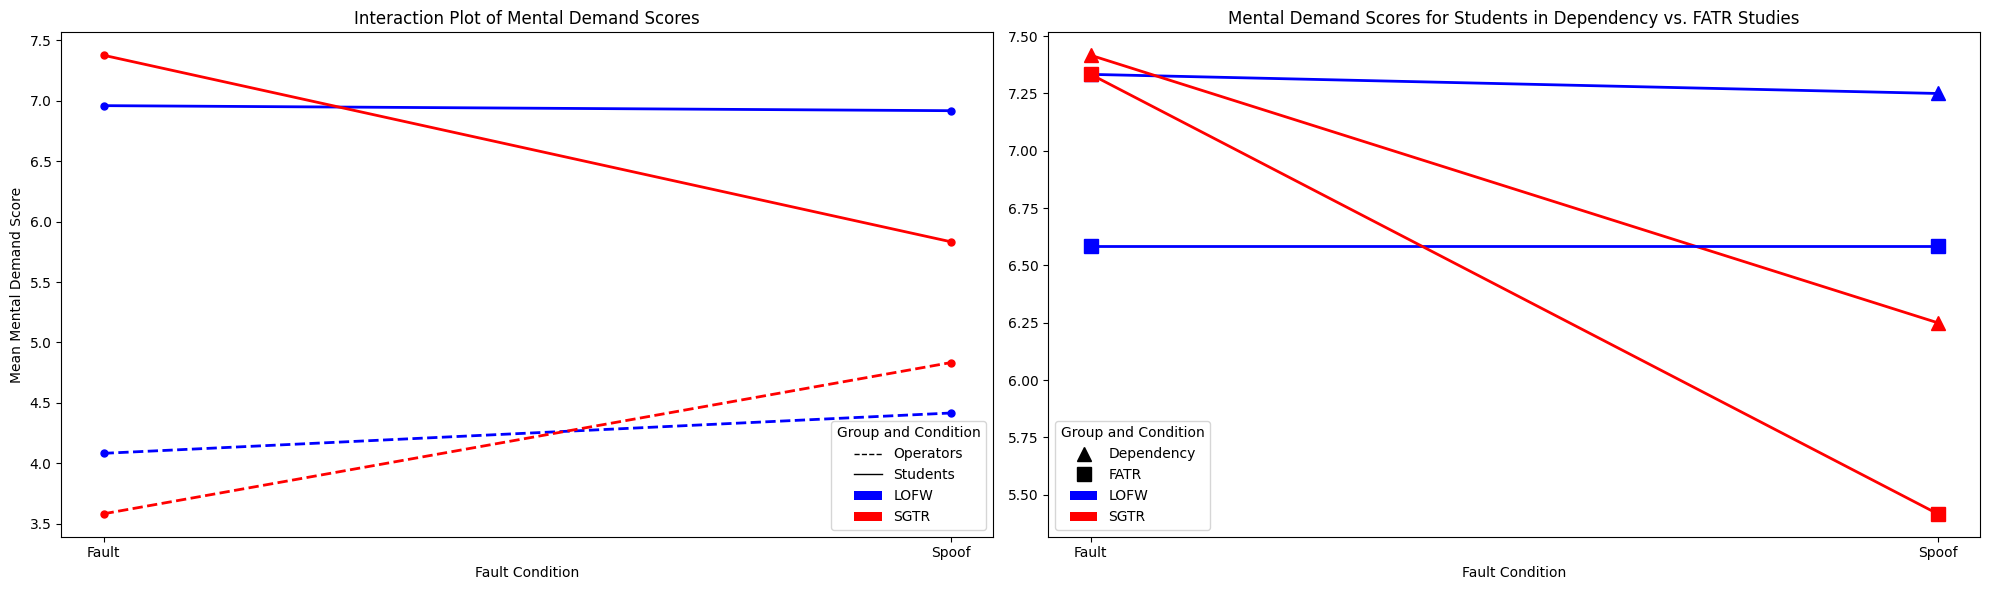

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Load the dataset
data_path = 'SCORES.csv'
new_data = pd.read_csv(data_path)

# Assuming 'Fault Condition' column exists with values 'Fault' and 'Spoof'
# No need to convert to numeric if we're using categorical plots directly

# Preparing data for the plot - Re-calculating here for clarity
mean_scores = new_data.groupby(['Skill', 'Scenario', 'Fault Condition'])['Mental Demand'].mean().reset_index()

# Preparing data for Operators and Students for the left plot
operators = mean_scores[mean_scores['Skill'] == 'Operator']
students = mean_scores[mean_scores['Skill'] == 'Student']

# Preparing data for the right plot specifically comparing Students in Dependency study to Students in FATR study
# Ensure this step is correct - This might need adjustment based on your actual data structure
# Assuming there's a 'Study' column in `new_data` for this step
mean_scores_students = new_data[new_data['Skill'] == 'Student'].groupby(['Study', 'Scenario', 'Fault Condition'])['Mental Demand'].mean().reset_index()


# Start plotting side-by-side
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# LEFT PLOT (axs[0])
# Operators - Dashed lines
for scenario, color in zip(['LOFW', 'SGTR'], ['blue', 'red']):
    subset = operators[operators['Scenario'] == scenario]
    axs[0].plot(subset['Fault Condition'], subset['Mental Demand'], label=f'Operators - {scenario}', marker='o', markersize=5, linestyle='--', linewidth=2, color=color)

# Students - Solid lines
for scenario, color in zip(['LOFW', 'SGTR'], ['blue', 'red']):
    subset = students[students['Scenario'] == scenario]
    axs[0].plot(subset['Fault Condition'], subset['Mental Demand'], label=f'Students - {scenario}', marker='o', markersize=5, linestyle='-', linewidth=2, color=color)

axs[0].set_title('Mental Demand Scores Students vs Operators Across Studies')
axs[0].set_xlabel('Fault Condition')
axs[0].set_ylabel('Mean Mental Demand Score')

# Creating custom legend entries
legend_elements = [Line2D([0], [0], color='black', lw=1, label='Operators', linestyle='--'),
                   Line2D([0], [0], color='black', lw=1, label='Students', linestyle='-'),
                   Patch(facecolor='blue', label='LOFW'),
                   Patch(facecolor='red', label='SGTR')]
axs[0].legend(handles=legend_elements, title='Group and Condition')


# RIGHT PLOT (axs[1])
# Assuming 'Study' column exists and correct data is prepared
for study, marker in zip(['Dependency', 'FATR'], ['^', 's']):
    for scenario, color in zip(['LOFW', 'SGTR'], ['blue', 'red']):
        subset = mean_scores_students[(mean_scores_students['Study'] == study) & (mean_scores_students['Scenario'] == scenario)]
        axs[1].plot(subset['Fault Condition'], subset['Mental Demand'], label=f'{study} - {scenario}', marker=marker, markersize=10, linestyle='-', linewidth=2, color=color)

axs[1].set_title('Mental Demand Scores for Students Between Subjects')
axs[1].set_xlabel('Fault Condition')
# axs[1].set_ylabel('Mean Mental Demand Score')  # Might be omitted if y-axis is shared

legend_elements = [
    Line2D([0], [0], marker='^', color='black', label='Dependency', linestyle='None', markersize=10),
    Line2D([0], [0], marker='s', color='black', label='FATR', linestyle='None', markersize=10),
    Patch(facecolor='blue', label='LOFW'),
    Patch(facecolor='red', label='SGTR')
]
axs[1].legend(handles=legend_elements, title='Group and Condition')

plt.tight_layout()
plt.show()